In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [4]:
#1 understanding the data

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [40]:
#visualizing the data

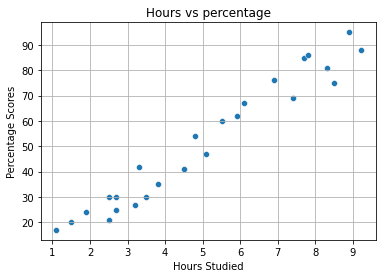

In [42]:
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.title('Hours vs percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.grid()
plt.show()

In [43]:
# preparing the data

In [45]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
coeff=regressor.coef_
print(f'The coefficient is {coeff}')
intercept = regressor.intercept_
print(f'The intercept is {intercept}')
print("Training Complete")

The coefficient is [9.91065648]
The intercept is 2.018160041434662
Training Complete


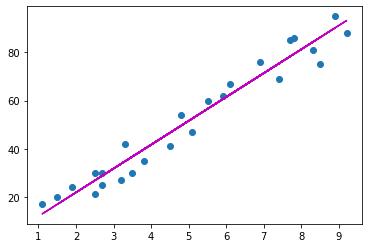

In [58]:
#plotting the regression line
line = regressor.coef_*x+regressor.intercept_

#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color = 'm')
plt.show()

In [59]:
print(x_test)
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


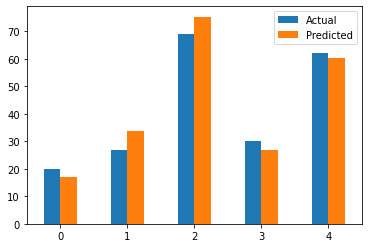

In [61]:
#Comparing Actual Vs Predicted
df= pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [62]:
#Predicting the Score with our own data
hours=9.25
pred = regressor.predict([[hours]])
print(f'No of hours = {hours}')
print(f'Predicted Scores = {pred[0]}')

No of hours = 9.25
Predicted Scores = 93.69173248737539


In [69]:
from sklearn import metrics
print(f'Mean Absolute Error:{metrics.mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error:{metrics.mean_squared_error(y_test,y_pred)}')
print(f'Root Mean Squared Error:{np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')


Mean Absolute Error:4.183859899002982
Mean Squared Error:21.598769307217456
Root Mean Squared Error:4.647447612100373
